In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pandas as pd

from config import Config
from img_util import show_img_tensor_CHW
from fliker_img_comment_dataset import ImgCommentDataset
from pathlib import Path
import torch
from torch.utils.data import DataLoader


/opt/anaconda3/envs/torch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
img_comments_folder = Path("/Users/chengbai/ml/dataset/flickr30k_images/")
img_comments_file = img_comments_folder / "results.csv" # /Users/chengbai/ml/dataset/flickr30k_images/results.csv
imgs_folder = img_comments_folder / "flickr30k_images"  # /Users/chengbai/ml/dataset/flickr30k_images/flickr30k_images

list(imgs_folder.glob("*.jpg"))[:2]

[PosixPath('/Users/chengbai/ml/dataset/flickr30k_images/flickr30k_images/2609797461.jpg'),
 PosixPath('/Users/chengbai/ml/dataset/flickr30k_images/flickr30k_images/1788892671.jpg')]

In [3]:
# The current `results.csv` file is using "| " to seperate 3 columns. 
# For the pd.read_csv, the `sep` here is given as a regular expression. 
df = pd.read_csv(img_comments_file, sep="|", index_col=False)
df = df.astype({'image_name': 'str', 'comment_number': int, 'comment': str})
df1 = df[0: 1]
list(df1["image_name"]), df1["image_name"][0]


(['1000092795.jpg'], '1000092795.jpg')

In [4]:
config = Config()
train_dataset = ImgCommentDataset(config, img_comments_folder, train_test_split="train", train_test_split_portion=0.8)
test_dataset = ImgCommentDataset(config, img_comments_folder, train_test_split="test", train_test_split_portion=0.8)
print(len(train_dataset), len(test_dataset))

127132 31783


idx: 0


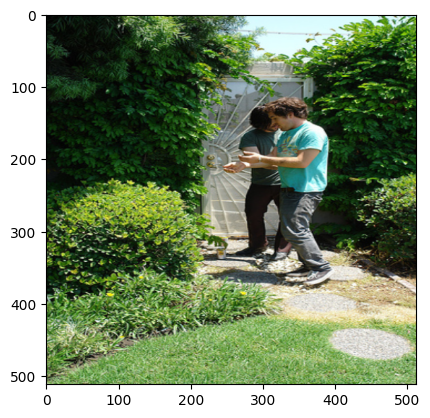

In [5]:
img_tensor, img_id_tensor, comment_encoding = train_dataset[0]
show_img_tensor_CHW(img_tensor)

In [6]:
# Data Loader
BATCH_SIZE = 2
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [7]:
# for batch_data in train_dataloader:
#     print(train_dataloader)
#     break
batch_img_tensors, img_id_tensors, batch_text_encodings = next(iter(train_dataloader))
print(f"batch_img_tensors: {batch_img_tensors.size()}")
print(f"batch_text_encodings: {batch_text_encodings.size()}")

idx: 83651
idx: 54101


ValueError: too many values to unpack (expected 2)

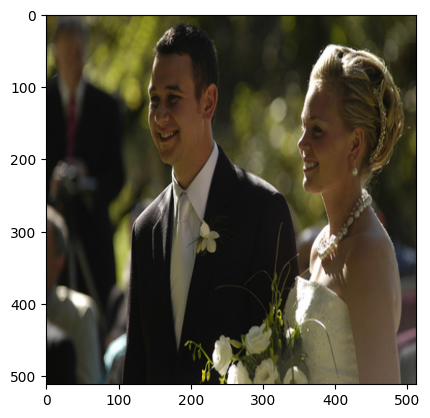

In [ ]:
plt.imshow(batch_img_tensors[0].permute(1, 2, 0)) # C x H x W => H x W x C

In [ ]:
!pip list

Package                   Version
------------------------- --------------
absl-py                   2.1.0
accelerate                0.31.0
aiohttp                   3.9.5
aiosignal                 1.3.1
annotated-types           0.7.0
anyio                     4.4.0
appnope                   0.1.4
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.0.5
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
beautifulsoup4            4.12.3
black                     24.4.2
bleach                    6.1.0
Brotli                    1.1.0
cached-property           1.5.2
certifi                   2024.7.4
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
comm                      0.2.2
contourpy                 1.2.1
cycler                    0.12.1
datasets                  2.20.0
debugpy                   1.6.7
decorator       